# Titanic - Data Analysis

## Introduction

As taken from Kaggle, 'The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.'

The data set used for this analysis is a subset of the complete data set and contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. 

For more information on the data set, visit [Kaggle](https://www.kaggle.com/c/titanic/data).


## Goal

The goal of this analysis is to analyze the data set and provide insights or identify patterns by investigating the data set.

### Import Packages

In [561]:
#Import and load necessary packages
import re
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as pyplt
from matplotlib import figure as fig
from matplotlib.gridspec import GridSpec

#This is to plot the graphs within the same jupyter cell
%matplotlib inline

#Adjusting the plot area size to accommodate bigger/wider graphs
pyplt.rcParams['figure.figsize'] = 12,5


### Load data

In [562]:
#Load dataset 
#This loads the csv file to a pandas data frame
#Note that the path given below is where the csv file exists locally with in Python's current working directory
#Repoint the path as necessary to make sure the function read_csv is able to find the csv

titanic = pd.read_csv("Udacity/P2/Titanic/titanic-data.csv")

### Data Exploration and Processing

In [563]:
#Exploring the dataset for available columns and type of data
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


While the field 'Embarked' holds an abbreviation for the port of embarkation, having the name of the port in this field looks more meaningful. Below is a function to name the ports in the Embarked field of the data set.

Note that the port names were taken from the [Kaggle](https://www.kaggle.com/c/titanic/data) website.

In [564]:
ports = ["Cherbourg", "Queenstown", "Southampton"]

In [565]:
# Function to rename any abbreviated field based on a list of values with names
def nameports(field):
    for e in range(len(field)):
        for port in range(len(ports)):
            if field[e] == re.findall('.',ports[port])[0]:
                field[e] = ports[port]            
                

In [566]:
nameports(titanic["Embarked"])

c:\python27\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Although this is just a one time change, a function was built just in case other fields like 'Pclass' also needed to be renamed.
The function above can be improved to accept different fields and their corresponding list of names.

In [567]:
#Making sure the Embarked field has been updated
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


In [570]:
#Taking a look at the basic stats
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### How many people were on the ship and how many survived?

There were 891 passengers on Titanic and of them only 342 survived with an overall survival rate of 38%.

In [571]:
#Get some basic counts and stats

totalpassengers = len(set(titanic["PassengerId"]))
survived = sum(titanic["Survived"])
overallsurvivalrate = format((survived/float(totalpassengers)) * 100, '0.2f')

print "Total Passengers on Titanic", totalpassengers
print "Passengers Survived", survived
print "Overall Survival Rate", overallsurvivalrate,"%"

Total Passengers on Titanic 891
Passengers Survived 342
Overall Survival Rate 38.38 %


### How has the travel class on the ship and the gender of passengers affect the survival rate?

From the bar plot below, it is evident that women in the 1st class had the highest survival rate at 10% followed by women in 2nd and 3rd classes at around 8% each. While the survival rate of men in 1st and 3rd class was around 5%, men in 2nd class seem to have the lowest survival rate.

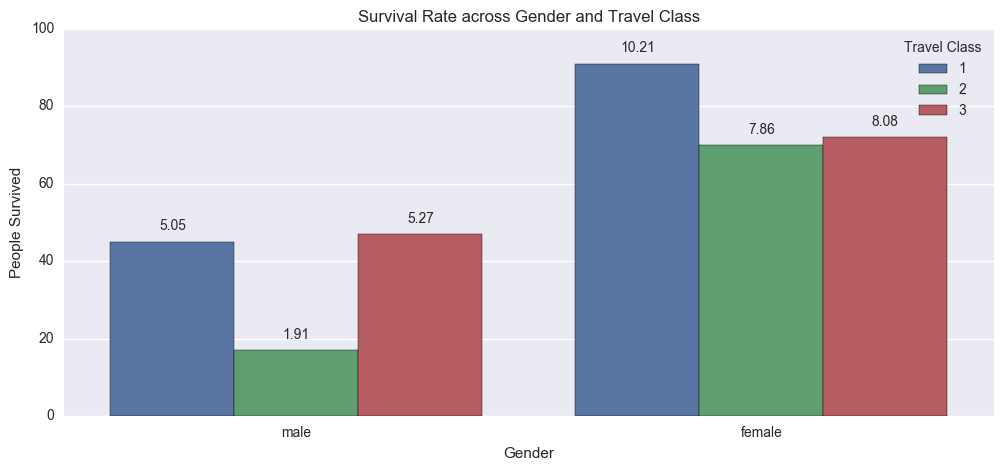

In [572]:
#Builds a bar plot with gender and travel class on the x-axis; number of people survived on the y-axis and survival rate in %
genderplt = sns.barplot(x = "Sex", y = "Survived", hue = "Pclass", data = titanic, estimator = np.sum, ci = None)
genderplt.set(ylabel = "People Survived", xlabel = "Gender")
for p in genderplt.patches:
    height = p.get_height()
    genderplt.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height * 100)/totalpassengers),
            ha="center") 
genderplt.get_axes().legend(title = "Travel Class")
genderplt.set(title = "Survival Rate across Gender and Travel Class")

The plot below gives a better picture of the same. While the deaths in the first and second class were contained, third class seems to be the worst affected for both men and women.

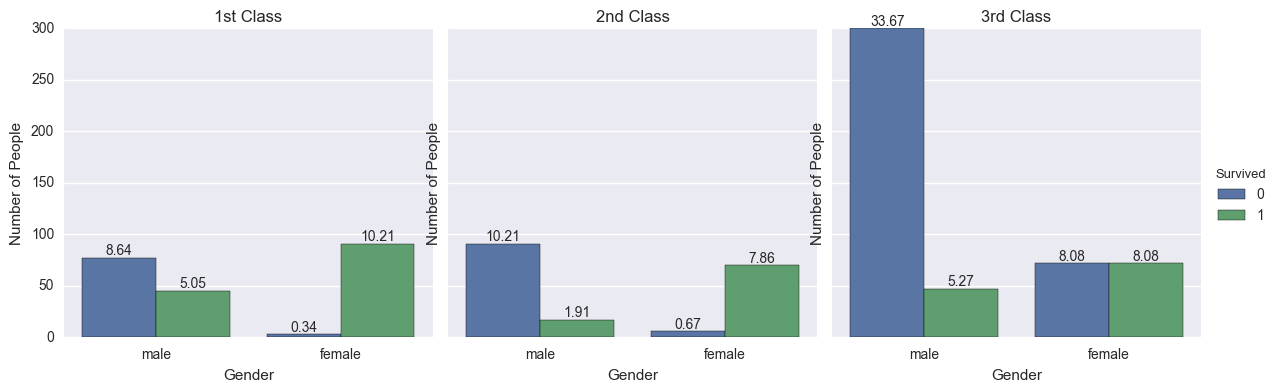

In [573]:
#Builds a countplot split on travel class
factorplt = sns.factorplot(x="Sex", hue="Survived", col="Pclass", data=titanic, kind="count")

factorplt.set(ylabel = "Number of People", xlabel = "Gender")

titles = ["1st Class","2nd Class","3rd Class"]

for ax, title in zip(factorplt.axes.flat, titles):
    ax.set_title(title)
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format((height * 100)/totalpassengers),
                ha="center") 

    

The travel class has had a huge impact on the survival of passengers on the Titanic, with people travelling by 1st and 2nd class having a higher probability of survival and within those classes, women having a better chance of surviving over men.

### How has the age of passengers affected the survival rate?

There are a lot of instances where Age is either missing values or have fractionals in them. For this particular analysis, missing ages have been filled with 0 and the fractinals have been rounded. 


In [574]:
titanic['Age'].unique()

array([ 22.  ,  38.  ,  26.  ,  35.  ,    nan,  54.  ,   2.  ,  27.  ,
        14.  ,   4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,
        15.  ,  28.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,
        18.  ,   3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,
        11.  ,  45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  30.  ,
        33.  ,  23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,
        14.5 ,  70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,
        40.5 ,  44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,
        20.5 ,  62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,
        60.  ,  10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,
        80.  ,  70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,  74.  ])

In [575]:
titanic['Age'].isnull().sum()

177

In [576]:
# A function to clean up the age field
def cleanup(df, field, convtoint):
    
    #Check if there are any missing values (Nan and make them 0
    df[field].fillna(value = 0, inplace = True)
    
    #Check if it needs to be converted to int
    if convtoint == 1:
        df[field] = df[field].astype(int)
    
    #Round the values
    df[field].round(0)
        
    return field + " has been cleaned up"

In [577]:
cleanup(titanic, "Age", 1)

'Age has been cleaned up'

In [578]:
average_age_titanic    =titanic['Age'].mean()
std_age_titanic        =titanic['Age'].std()

print average_age_titanic
print std_age_titanic

23.7833894501
17.5973438421


In the initial phase of analysis, filling the missing ages with 0, skewed the distribution graphs to the left and since 0 is not a valid age for those passengers and is just missing, Age 0 has been excluded from the analysis. 

Although age 0 has been excluded for the purposes of this analysis, predictions or standardizing ages of those passengers could also be made to improve the accuracy of the charts.

In [579]:
average_age_titanic    =titanic[titanic.Age > 0]['Age'].mean()
std_age_titanic        =titanic[titanic.Age > 0]['Age'].std()

print average_age_titanic
print std_age_titanic

29.973125884
14.3032955152


(0, 90)

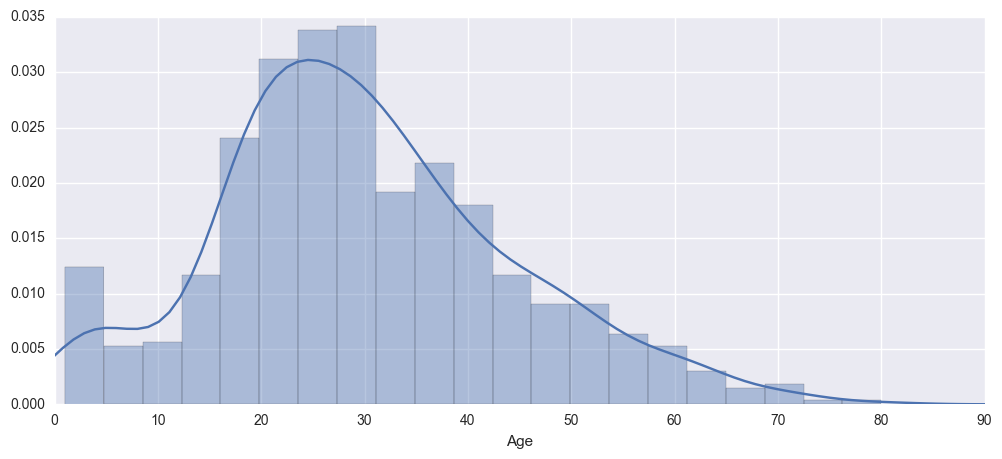

In [581]:
#Builds a age distribution plot
agedist = sns.distplot(titanic[titanic.Age > 0]['Age'])
agedist.set_xlim(0, max(titanic[titanic.Age > 0]['Age'])+10)

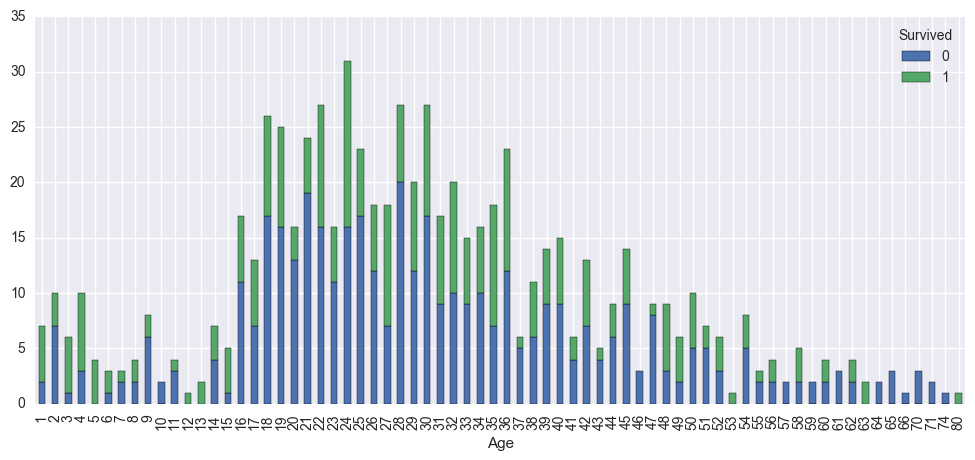

In [582]:
#Builds a plot on age and survival
ageplt = titanic.groupby(['Survived', 'Age']).count().unstack('Survived')["PassengerId"]
ageplt[1:].plot(kind='bar', stacked=True, legend=['Dead','Survived'] )

From the above visualization, it can be noted that the highest population of passengers is of the age group 16-40 and the least survival rate of passengers is of the age group 18-30.

### What effect did the fare paid have on survival rate?

As it is very noticeable from the Y-axis of the visualizations below, 1st class had fares upto a little more than 500 and it looks like only 2 passengers paid more than 500. What is interesting though is that a big majority of passengers in 1st class have paid less than 100 and on an verage people who have paid more have survived. 

While in second and third classes, majority of passengers have paid fares below 30 and 20 respectively. 

On an average, older people have paid lesser fares in all the classes alike and the chances of survival also decreases as the age of passenger increases. 

Please note that the visualizations do not include passengers is age has missing values or is 0.

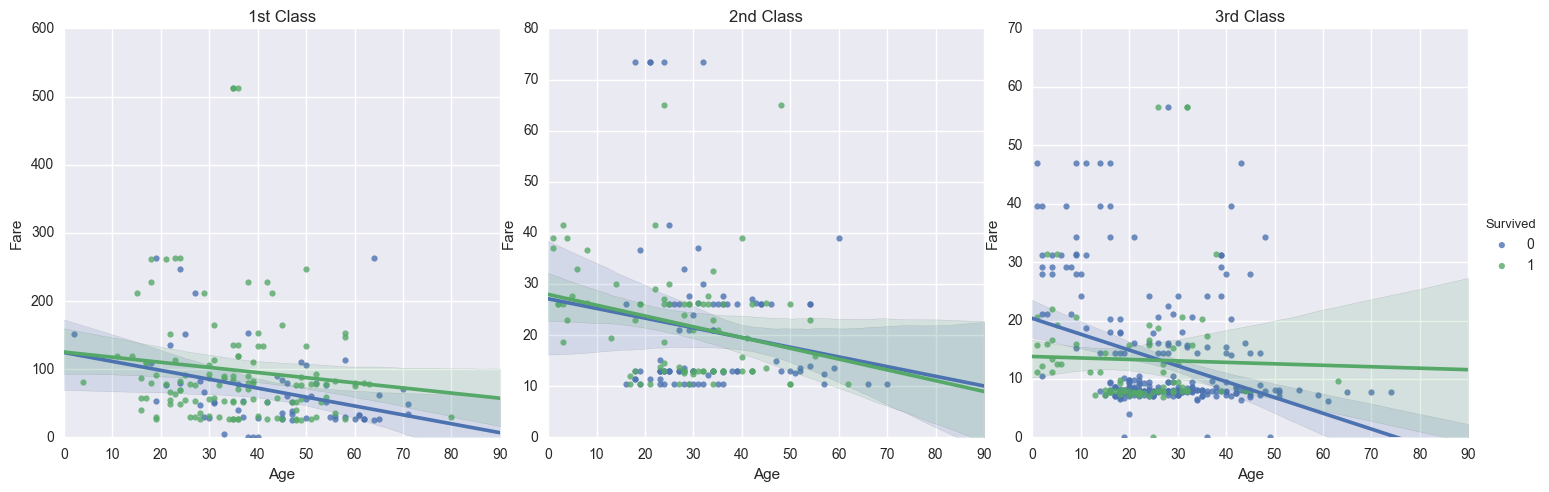

In [583]:
#Builds a linear relationship between age and fare over survival 
fareplt = sns.lmplot(x="Age", y="Fare", hue = 'Survived', col="Pclass", data=titanic[titanic.Age>0], sharey = False)
fareplt.set(ylabel = "Fare", xlabel = "Age")
fareplt.axes[0,0].set_ylim(0,)
fareplt.axes[0,1].set_ylim(0,)
fareplt.axes[0,2].set_ylim(0,)
fareplt.axes[0,0].set_xlim(0,)
fareplt.axes[0,1].set_xlim(0,)
fareplt.axes[0,2].set_xlim(0,)
titles = ["1st Class","2nd Class","3rd Class"]

for ax, title in zip(fareplt.axes.flat, titles):
    ax.set_title(title)

### What role has the port of embarakation played?

While Southampton had the most number of passengers, it also had the least survival rate. This is probably because Southampton also had the most number of passengers in 3rd class. It can be concluded that Southampton is a really busy port.
Queenstown probably is the least popular port with minimal passengers, especially among 1st and 2nd travel classes. 

In [584]:
emb = titanic.groupby(['Survived', 'Embarked','Pclass']).count().unstack('Embarked')['PassengerId']
emb.head(6)

Embarked         Cherbourg  Queenstown  Southampton
Survived Pclass                                    
0        1              26           1           53
         2               8           1           88
         3              41          45          286
1        1              59           1           74
         2               9           2           76
         3              25          27           67

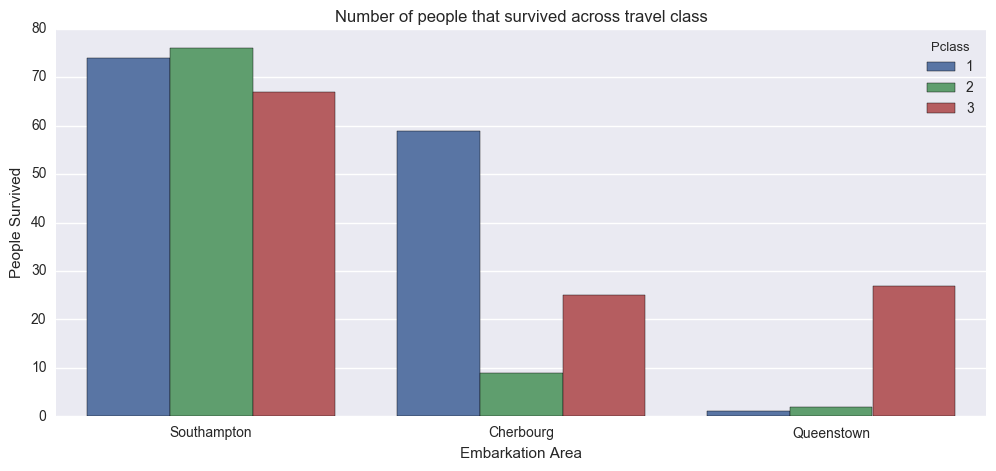

In [593]:
#Builds a bar plot betwen embarkation port and passengers survived over travel class
portplt = sns.barplot(x = "Embarked", y = "Survived", hue = "Pclass", data = titanic, estimator = np.sum, ci = None)
portplt.set(ylabel = "People Survived", xlabel = "Embarkation Area")
portplt.set(title = "Number of people that survived across travel class")

In [598]:
emb = titanic.groupby(['Survived', 'Embarked']).count().unstack('Embarked')['PassengerId']
emb = emb/emb.sum()*100
emb.head()

Embarked,Cherbourg,Queenstown,Southampton
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


In [595]:
#Builds a function that builds a pie plot on survival/death rate
def plotpie(series):
    
    i = 2
    for c in list(series):
        pyplt.figure(i, figsize = (4,2))
        pyplt.pie(emb[c], labels=['Percent Dead', 'Percent Survived'], colors=['red', 'green'], autopct='%1.1f%%', \
                  shadow=True, startangle=90)
        # View the plot drop above
        pyplt.axis('equal')
        pyplt.title("Survival Rate at " + c)

        
        i+= 1
        

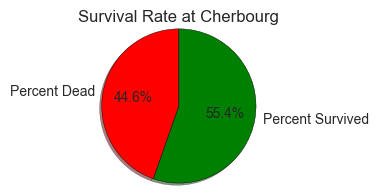

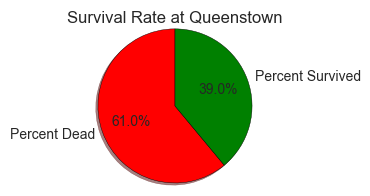

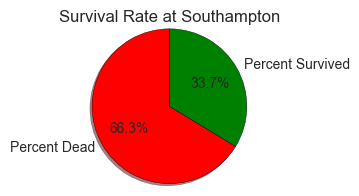

In [600]:
#To build pie plots at different embarkation ports
plotpie(emb[["Cherbourg", "Queenstown", "Southampton"]])

### Conclusion 

The features below were analyzed in this analysis:

* Gender
* Travel Class
* Age
* Fare
* Port of Embarkation

The most evident findings in this analysis are that 

* passengers in the upper class had a better chance of surviving than the passengers in lower class
* women had a better chance of surviving over men
* passengers with ages between 18 and 30 were more and also had a very poor survival rate
* Southamptopn port seemed busier and popular with more number of passengers and Queenstown port the least with very few passengers especially in first and second classes


### References

1. [Kaggle](https://www.kaggle.com/c/titanic)
2. [Seaborn](http://seaborn.pydata.org/tutorial.html)
3. [Matplotlib](http://matplotlib.org/)
4. [Pandas](http://pandas.pydata.org/)